In [2]:
import numpy as np
import pandas as pd

### problem PARAMETERS #######
# inter_arrival_max = 5
# inter_arrival_min = 3
beta_arrival = 3

# service_time_max = 6
# service_time_min = 2
beta_service = 2

n_costumers = 30

In [3]:
# target_length = 20

In [23]:
def exp(kp, ki, kd, target_length):

    columns = ["no", "time", "costumer_id", "type", "is_busy", "queue_length"]
    time_log = pd.DataFrame(columns=columns)
    queue_arr = []
    departure_arr = []
    arrival_arr = []

    costumer_id = 1
    time_ = 0
    is_busy = False

    kp, ki, kd = 0.27, 0.1, 0.2
    sum_error = 0
    target_length = 10
    prev_error = target_length
    


    # time_log = time_log.append(pd.Series(0, index=time_log.columns). ignore_index=True)
    arrival_arr.append( (costumer_id, time_) )
    event = 0
    n_events = 1000
    while True:
        if event > n_events:
            break
        # cari yang terjadi dulu
        closest_arrival_time = 2**31
        if arrival_arr:
            closest_arrival_time = arrival_arr[0][1]

        closest_departure_time = 2**31
        if departure_arr:
            closest_departure_time = departure_arr[0][1]

        if closest_arrival_time < closest_departure_time: # arrival
            current_costumer_id, current_time = arrival_arr.pop(0)
            log = pd.DataFrame([[event, current_time, current_costumer_id, "arrival", is_busy, len(queue_arr)]], columns=columns)
            time_log = pd.concat([time_log, log])
            interarrival_time = np.random.exponential(beta_arrival)
            arrival_arr.append( (current_costumer_id+1, current_time+interarrival_time) )
            if not is_busy:
                # ---------------
                error = target_length - len(queue_arr)
                sum_error += error
                derr = (error-prev_error)
                prev_error = error
                beta_service = max(3 + (kp*error + ki*sum_error + kd*derr), 0.1)
                # ---------------
                service_time = np.random.exponential(beta_service)
                departure_arr.append((current_costumer_id, current_time+service_time))
                is_busy = True
            else:
                queue_arr.append((current_costumer_id))

        else: # departure
            current_costumer_id, current_time = departure_arr.pop(0)
            is_busy = len(queue_arr) > 0
            queue_length = max(len(queue_arr)-1, 0)
            log = pd.DataFrame([[event, current_time, current_costumer_id, "departure", is_busy, queue_length]], columns=columns)
            time_log = pd.concat([time_log, log])
            if len(queue_arr) > 0:
                current_costumer_id = queue_arr.pop(0)
                # ---------------
                error = target_length - len(queue_arr)
                sum_error += error
                derr = (error-prev_error)
                prev_error = error
                beta_service = max(3 + (kp*error + ki*sum_error + kd*derr), 0.1)
                # ---------------
                service_time = np.random.exponential(beta_service)
                departure_arr.append( (current_costumer_id, current_time+service_time) )
                is_busy = True
            else:
                is_busy = False

        event += 1

    time_log.plot(kind="line", x="time", y="queue_length")

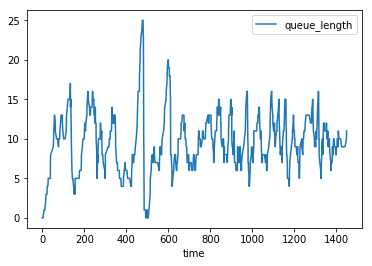

In [24]:
exp(2.8, 0.2, 0.2, 10)

In [22]:
time_log

,no,time,costumer_id,type,is_busy,queue_length,error,sum_error
0,0,0,1,arrival,False,0,10,10
0,1,1.92767,2,arrival,True,0,10,20
0,2,2.65765,3,arrival,True,1,9,29
0,3,4.23131,4,arrival,True,2,8,37
0,4,4.78977,5,arrival,True,3,7,44
0,5,10.5061,6,arrival,True,4,6,50
0,6,13.3106,7,arrival,True,5,5,55
0,7,17.0476,1,departure,True,5,4,59
0,8,21.8425,8,arrival,True,5,5,64
0,9,25.0105,9,arrival,True,6,4,68
